In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = "whitegrid")

In [2]:
!pip install ts2vg
!pip install igraph
!pip install cairocffi
# !pip install pycairo
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=a410ae3fe7199c90a71bbafb3223cfb965b2d1f20b13b51f7012ed4f642437f3
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.4 MB/s 


# Task 1
## Generate samples

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sub3_climbingdown.csv to sub3_climbingdown.csv
Saving sub2_walking.csv to sub2_walking.csv
Saving sub2_running.csv to sub2_running.csv
Saving sub2_climbingup.csv to sub2_climbingup.csv
Saving sub2_climbingdown.csv to sub2_climbingdown.csv
Saving sub3_walking.csv to sub3_walking.csv
Saving sub3_running.csv to sub3_running.csv
Saving sub3_climbingup.csv to sub3_climbingup.csv
Saving sub1_walking.csv to sub1_walking.csv
Saving sub1_running.csv to sub1_running.csv
Saving sub1_climbingup.csv to sub1_climbingup.csv
Saving sub1_climbingdown.csv to sub1_climbingdown.csv


In [4]:
df11 = pd.read_csv('sub1_climbingdown.csv')
df12 = pd.read_csv('sub1_climbingup.csv')
df13 = pd.read_csv('sub1_running.csv')
df14 = pd.read_csv('sub1_walking.csv')
df21 = pd.read_csv('sub2_climbingdown.csv')
df22 = pd.read_csv('sub2_climbingup.csv')
df23 = pd.read_csv('sub2_running.csv')
df24 = pd.read_csv('sub2_walking.csv')
df31 = pd.read_csv('sub3_climbingdown.csv')
df32 = pd.read_csv('sub3_climbingup.csv')
df33 = pd.read_csv('sub3_running.csv')
df34 = pd.read_csv('sub3_walking.csv')

In [5]:
# generate samples for each of the 3 subject
sub1_up = df11[1000:2023]
sub1_down = df12[1000:2023]
sub1_run = df13[1000:2023]
sub1_walk = df14[1000:2023]
sub2_up = df21[1000:2023]
sub2_down = df22[1000:2023]
sub2_run = df23[1000:2023]
sub2_walk = df24[1000:2023]
sub3_up = df31[1000:2023]
sub3_down = df32[1000:2023]
sub3_run = df33[1000:2023]
sub3_walk = df34[1000:2023]

In [6]:
sub1_up.head()

,id,attr_time,attr_x,attr_y,attr_z
1000,1001,1435996988030,5.722142,4.464588,0.661997
1001,1002,1435996988050,6.258443,6.097433,1.148618
1002,1003,1435996988071,6.345831,7.076063,1.823185
1003,1004,1435996988089,6.412870,7.289746,1.948880
1004,1005,1435996988112,6.301539,6.783970,1.407192


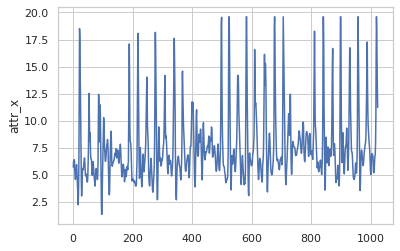

In [7]:
# example: when climb up on x accelerometer direction
sns.lineplot(x=range(1, len(sub1_up['attr_x'])+1), y=sub1_up['attr_x'])

## Apply NVG & HVG
## Compute the average degree, network diameter, and average path length

In [8]:
from networkx.algorithms.shortest_paths.weighted import all_pairs_bellman_ford_path_length
from ts2vg import NaturalVG
from ts2vg import HorizontalVG
import networkx as nx
import igraph as ig

def nvgplot(df, direction):
  ts = df[direction]
  g = NaturalVG()
  g.build(ts)
  ig_g = g.as_igraph()
  ad = np.mean(ig_g.degree())
  nd = ig_g.diameter()
  apl = ig_g.average_path_length()
  return ad, nd, apl

def hvgplot(df, direction):
  ts = df[direction]
  g = HorizontalVG()
  g.build(ts)
  ig_g = g.as_igraph()  
  ad = np.mean(ig_g.degree())
  nd = ig_g.diameter()
  apl = ig_g.average_path_length()
  return ad, nd, apl

## Tabulate all the results

In [9]:
def table(dataframe, subject, activity):
  data = {'Method':['NVG', 'NVG', 'NVG', 'HVG', 'HVG', 'HVG'], 'Subject':np.array([subject]*6), 'Accelerometer axis':['X','Y','Z','X','Y','Z'], 
        'Activity':np.array([activity]*6)}
  df = pd.DataFrame(data)
  nvg_results = [nvgplot(dataframe, i) for i in ['attr_x', 'attr_y', 'attr_z']]
  hvg_results = [hvgplot(dataframe, i) for i in ['attr_x', 'attr_y', 'attr_z']]
  results = nvg_results + hvg_results
  df[['Average Degree', 'Network Diameter', 'Average Path Length']] = results
  return df

In [10]:
df11 = table(sub1_up, 1, 'Climbing Up')
df12 = table(sub1_down, 1, 'Climbing Down')
df13 = table(sub1_run, 1, 'Running')
df14 = table(sub1_walk, 1, 'Walking')
df21 = table(sub2_up, 2, 'Climbing Up')
df22 = table(sub2_down, 2, 'Climbing Down')
df23 = table(sub2_run, 2, 'Running')
df24 = table(sub2_walk, 2, 'Walking')
df31 = table(sub3_up, 3, 'Climbing Up')
df32 = table(sub3_down, 3, 'Climbing Down')
df33 = table(sub3_run, 3, 'Running')
df34 = table(sub3_walk, 3, 'Walking')

In [11]:
pd.set_option('display.max_rows', None)
final = pd.concat([df11, df12, df13, df14, df21, df22, df23, df24, df31, df32, df33, df34]).sort_values(by = ['Method', 'Subject'], ignore_index = True)
display(final)

,Method,Subject,Accelerometer axis,Activity,Average Degree,Network Diameter,Average Path Length
0,HVG,1,X,Climbing Up,3.953079,32.0,14.503381
1,HVG,1,Y,Climbing Up,3.947214,28.0,12.512563
2,HVG,1,Z,Climbing Up,3.968719,23.0,9.954478
3,HVG,1,X,Climbing Down,3.958944,35.0,15.405276
4,HVG,1,Y,Climbing Down,3.953079,32.0,14.368107
5,HVG,1,Z,Climbing Down,3.951124,30.0,11.057543
6,HVG,1,X,Running,3.955034,22.0,7.565514
7,HVG,1,Y,Running,3.833822,90.0,31.613823
8,HVG,1,Z,Running,3.966764,19.0,8.723984
9,HVG,1,X,Walking,3.960899,26.0,11.573290


## 1-5 & 1-6: Generate scatter plots

### Walking & Running

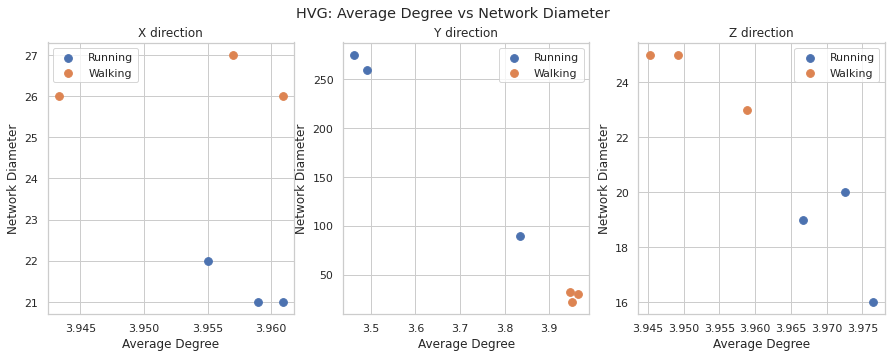

In [12]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
groups = final.groupby(['Method', 'Activity', 'Accelerometer axis'])

for name, group in groups:
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
    
ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('HVG: Average Degree vs Network Diameter')
plt.show()

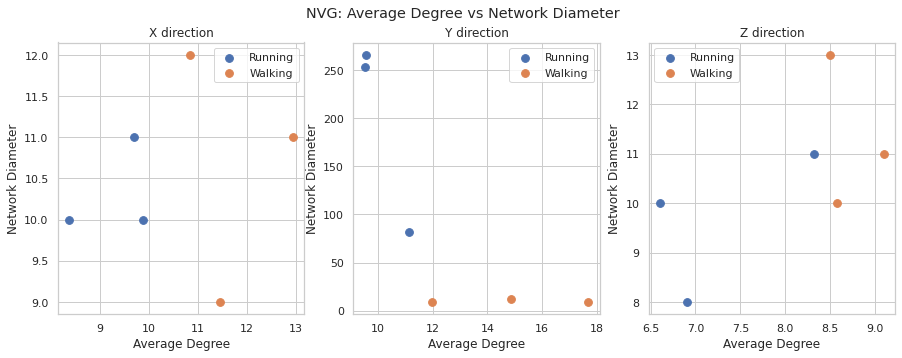

In [15]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')

for name, group in groups:
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Running') or (name[1] == 'Walking')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('NVG: Average Degree vs Network Diameter')
plt.show()

### Climbing Up & Climbing Down

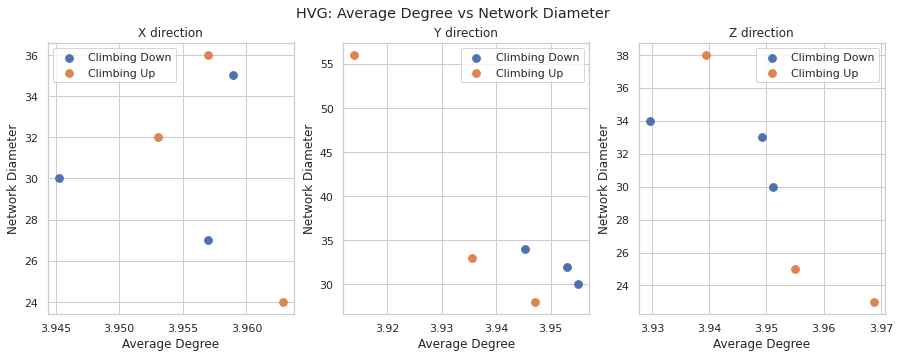

In [14]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
for name, group in groups:
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'HVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('HVG: Average Degree vs Network Diameter')
plt.show()

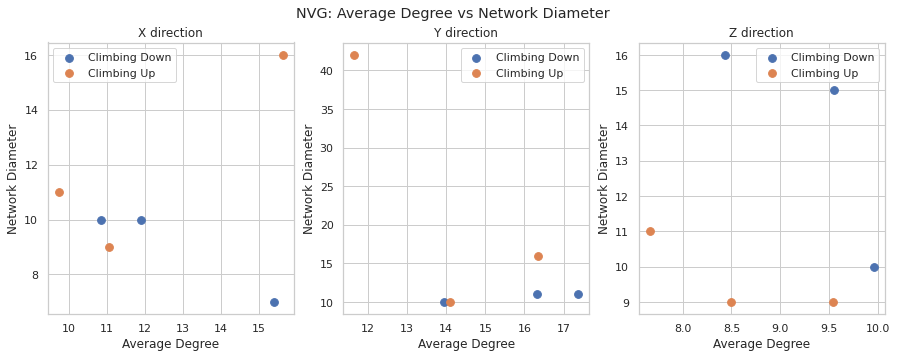

In [16]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_xlabel('Average Degree')
ax1.set_ylabel('Network Diameter')
ax1.set_title('X direction')
ax2.set_xlabel('Average Degree')
ax2.set_ylabel('Network Diameter')
ax2.set_title('Y direction')
ax3.set_xlabel('Average Degree')
ax3.set_ylabel('Network Diameter')
ax3.set_title('Z direction')
for name, group in groups:
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'X'):
    ax1.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Y'):
    ax2.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])
  if (name[0] == 'NVG') and ((name[1] == 'Climbing Up') or (name[1] == 'Climbing Down')) and (name[2] == 'Z'):
    ax3.scatter(group['Average Degree'], group['Network Diameter'], s = 60, label = name[1])

ax1.legend()
ax2.legend()
ax3.legend()
fig.suptitle('NVG: Average Degree vs Network Diameter')
plt.show()